### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [12]:
# Verifica la estructura de los datos de cada tienda
print("Información de Tienda 1:")
print(tienda.info())
print("\nInformación de Tienda 2:")
print(tienda2.info())
print("\nInformación de Tienda 3:")
print(tienda3.info())
print("\nInformación de Tienda 4:")
print(tienda4.info())

Información de Tienda 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None

Información de Tienda 2:
<class 'pandas.core.frame.DataF

In [13]:
 # Función para calcular métricas de facturación
def calcular_metricas_facturacion(df, nombre_tienda):
    # Total de ventas
    total_ventas = df['Precio'].sum()

    # Número de transacciones
    num_transacciones = df.shape[0]

    # Valor promedio por venta
    promedio_venta = total_ventas / num_transacciones

    # Ingresos por envíos
    ingresos_envios = df['Costo de envío'].sum()

    # Crear un DataFrame con los resultados
    metricas = pd.DataFrame({
        'Tienda': [nombre_tienda],
        'Total Ventas': [total_ventas],
        'Número de Transacciones': [num_transacciones],
        'Promedio por Venta': [promedio_venta],
        'Ingresos por Envíos': [ingresos_envios]
    })

    return metricas

# Calcular métricas para todas las tiendas
metricas_tienda1 = calcular_metricas_facturacion(tienda, 'Tienda 1')
metricas_tienda2 = calcular_metricas_facturacion(tienda2, 'Tienda 2')
metricas_tienda3 = calcular_metricas_facturacion(tienda3, 'Tienda 3')
metricas_tienda4 = calcular_metricas_facturacion(tienda4, 'Tienda 4')

# Combinar todas las métricas en un solo DataFrame
metricas_comparativas = pd.concat([
    metricas_tienda1,
    metricas_tienda2,
    metricas_tienda3,
    metricas_tienda4
]).reset_index(drop=True)

# Mostrar las métricas comparativas
print("\nMétricas comparativas de facturación:")
metricas_comparativas


Métricas comparativas de facturación:


,Tienda,Total Ventas,Número de Transacciones,Promedio por Venta,Ingresos por Envíos
0,Tienda 1,1.150880e+09,2359,487867.910131,61377900.0
1,Tienda 2,1.116344e+09,2359,473227.426876,59485100.0
2,Tienda 3,1.098020e+09,2359,465459.771089,58516600.0
3,Tienda 4,1.038376e+09,2358,440362.892282,55317400.0


Análisis de Facturación

Con base en los resultados:   

    Tienda 1: Mayor facturación total (1.15B), más transacciones (2359), promedio por venta más alto (487,867)

    Tienda 4: Menor facturación total (1.04B), menos transacciones (2358), promedio por venta más bajo (440,362)

  

# 2. Ventas por categoría

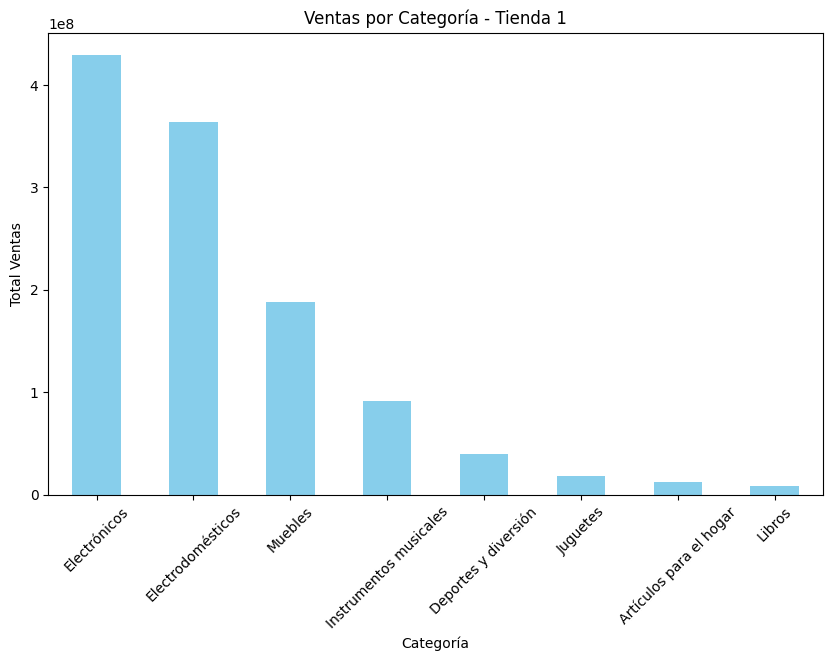

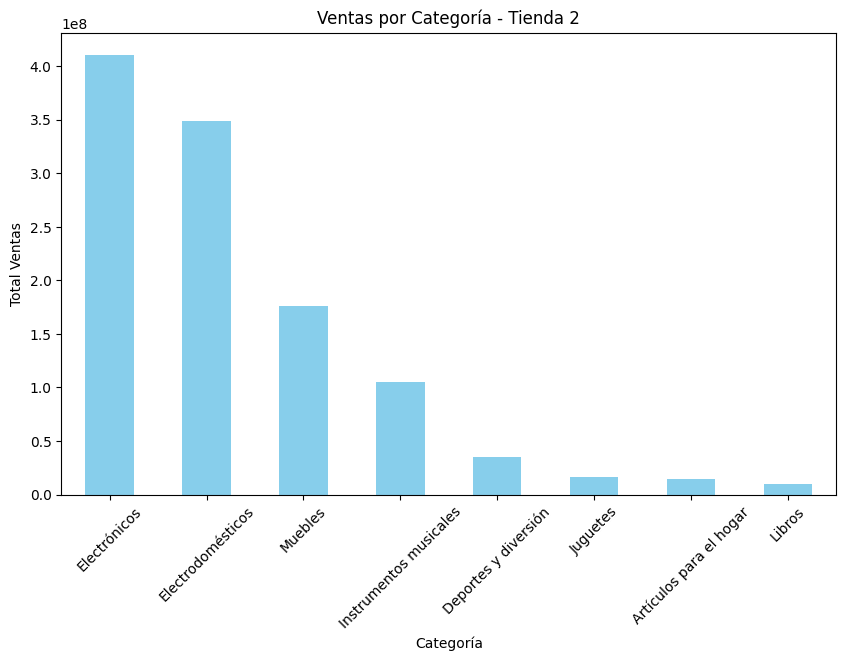

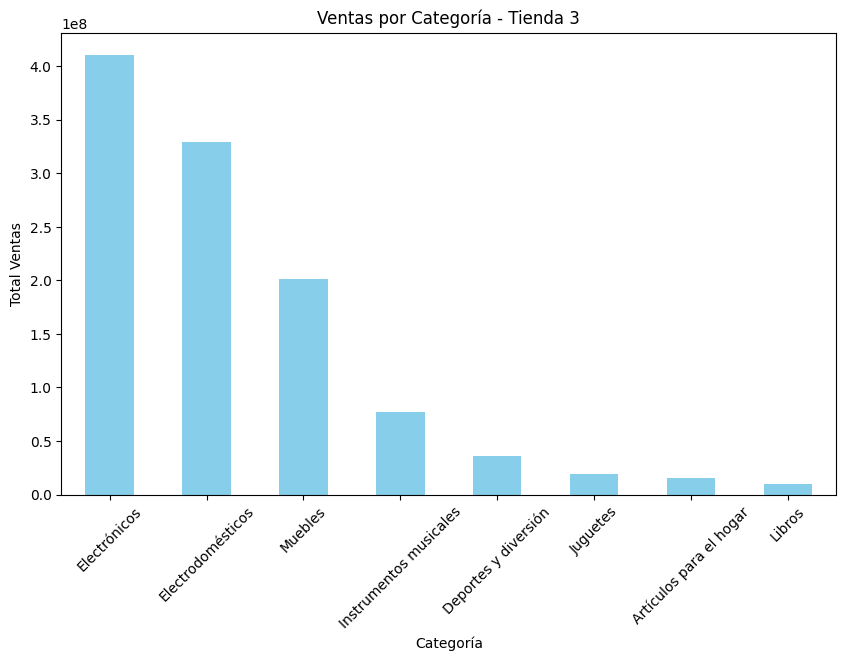

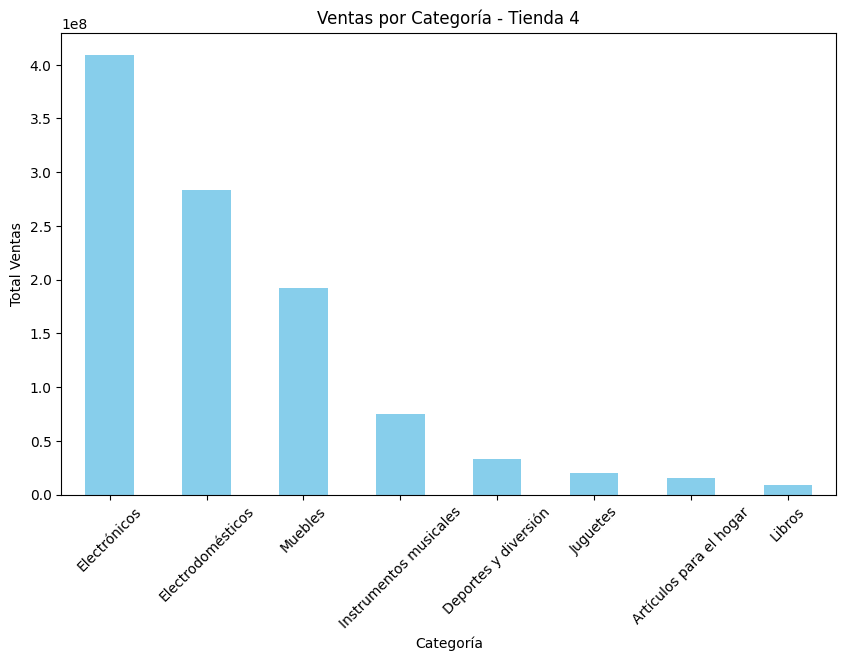

In [14]:
import matplotlib.pyplot as plt

def plot_ventas_por_categoria(df, tienda_num):
    ventas_categoria = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    ventas_categoria.plot(kind='bar', color='skyblue')
    plt.title(f'Ventas por Categoría - Tienda {tienda_num}')
    plt.ylabel('Total Ventas')
    plt.xlabel('Categoría')
    plt.xticks(rotation=45)
    plt.show()

    return ventas_categoria

# Generar gráficos para cada tienda
ventas_cat_tienda1 = plot_ventas_por_categoria(tienda, 1)
ventas_cat_tienda2 = plot_ventas_por_categoria(tienda2, 2)
ventas_cat_tienda3 = plot_ventas_por_categoria(tienda3, 3)
ventas_cat_tienda4 = plot_ventas_por_categoria(tienda4, 4)

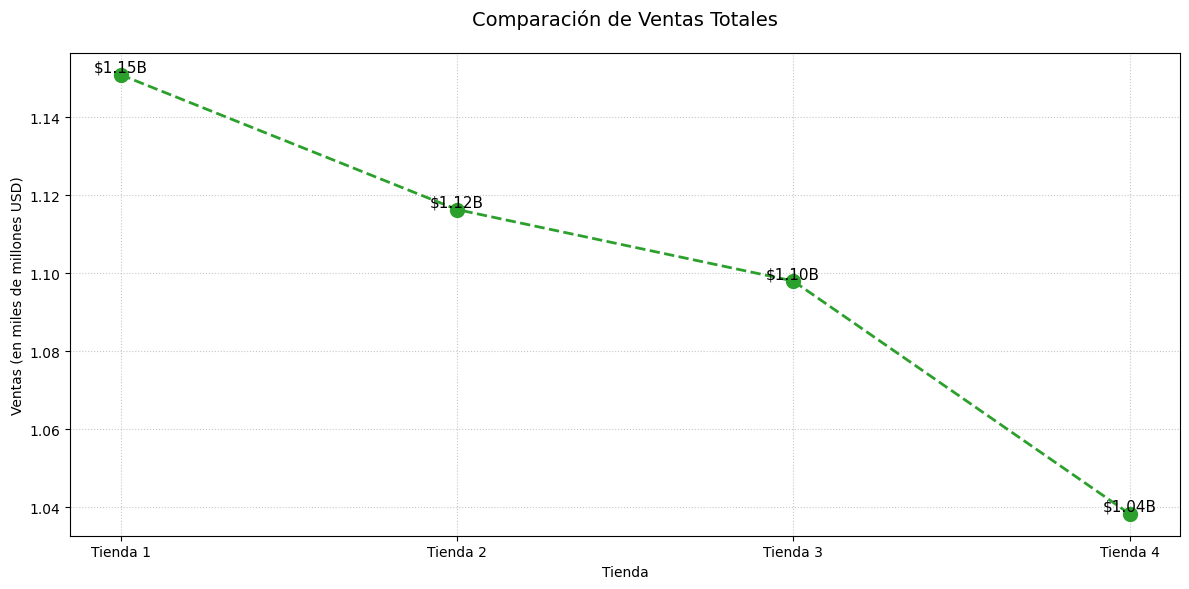

In [15]:
# Comparación de Ventas Totales
plt.figure(figsize=(12, 6))
plt.plot(metricas_comparativas['Tienda'], metricas_comparativas['Total Ventas']/1e9,
        marker='o', markersize=10, linestyle='--',
        color='#2ca02c', linewidth=2)

plt.title('Comparación de Ventas Totales', pad=20, fontsize=14)
plt.ylabel('Ventas (en miles de millones USD)')
plt.xlabel('Tienda')
plt.grid(True, linestyle=':', alpha=0.7)

# Añadir etiquetas con formato de dinero
for x, y in zip(metricas_comparativas['Tienda'], metricas_comparativas['Total Ventas']/1e9):
    plt.text(x, y, f'${y:.2f}B',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda

##  Gráfico de Calificaciones






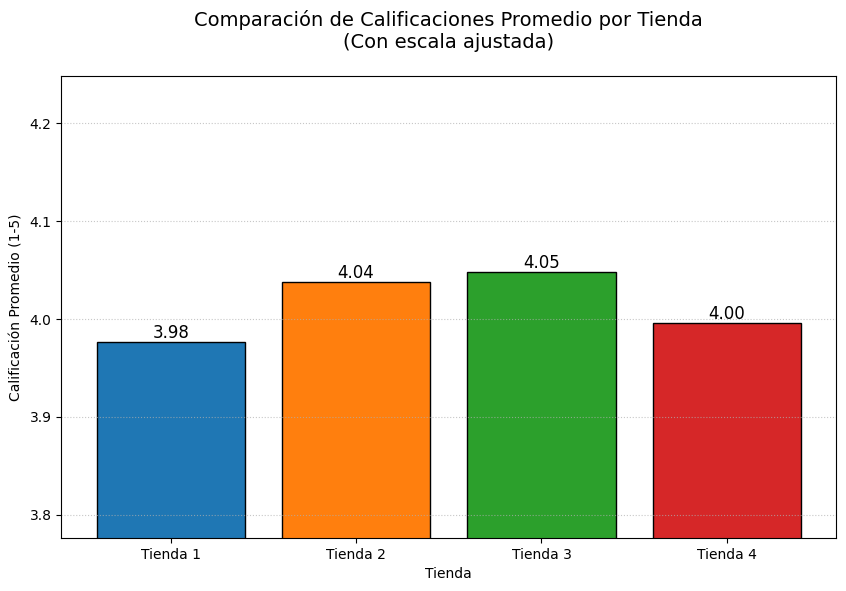

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar(calificaciones.keys(), calificaciones.values(),
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
              edgecolor='black', linewidth=1)

# Ajustar escala para destacar diferencias
min_val = min(calificaciones.values()) - 0.2
max_val = max(calificaciones.values()) + 0.2
plt.ylim(min_val if min_val > 0 else 0, max_val if max_val < 5 else 5)

plt.title('Comparación de Calificaciones Promedio por Tienda\n(Con escala ajustada)',
          pad=20, fontsize=14)
plt.ylabel('Calificación Promedio (1-5)')
plt.xlabel('Tienda')

# Añadir valores exactos sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=12)

# Mejorar la cuadrícula
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.show()

# 4. Productos más y menos vendidos

In [17]:
# Función para productos más vendidos
def productos_mas_vendidos(df, nombre):
    return df['Producto'].value_counts().head(5)

# Comparar entre tiendas
print("\nProductos más vendidos Tienda 1:")
print(productos_mas_vendidos(tienda, 'Tienda 1'))
print("\nProductos más vendidos Tienda 2:")
print(productos_mas_vendidos(tienda2, 'Tienda 2'))
print("\nProductos más vendidos Tienda 3:")
print(productos_mas_vendidos(tienda3, 'Tienda 3'))
print("\nProductos más vendidos Tienda 4:")
print(productos_mas_vendidos(tienda4, 'Tienda 4'))


Productos más vendidos Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos más vendidos Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos más vendidos Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Productos más vendidos Tienda 4:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


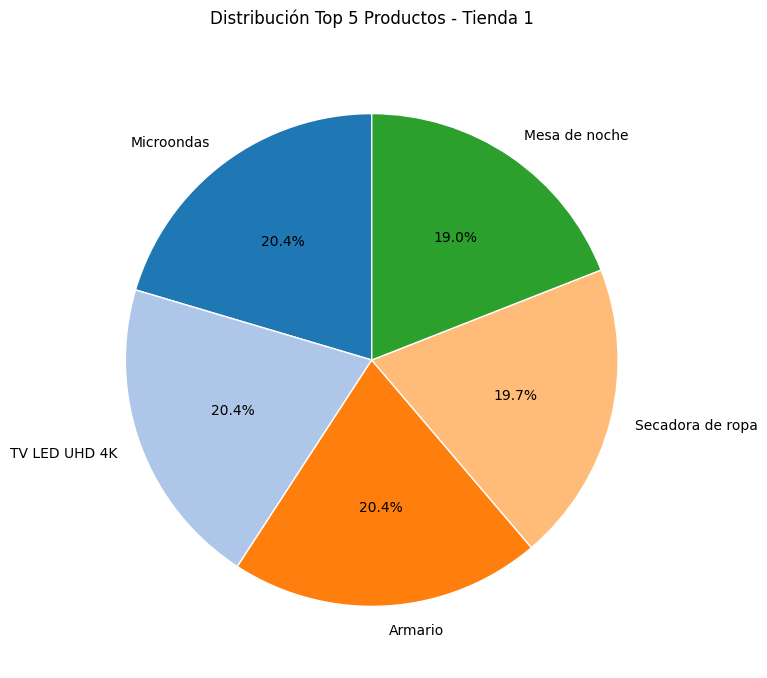

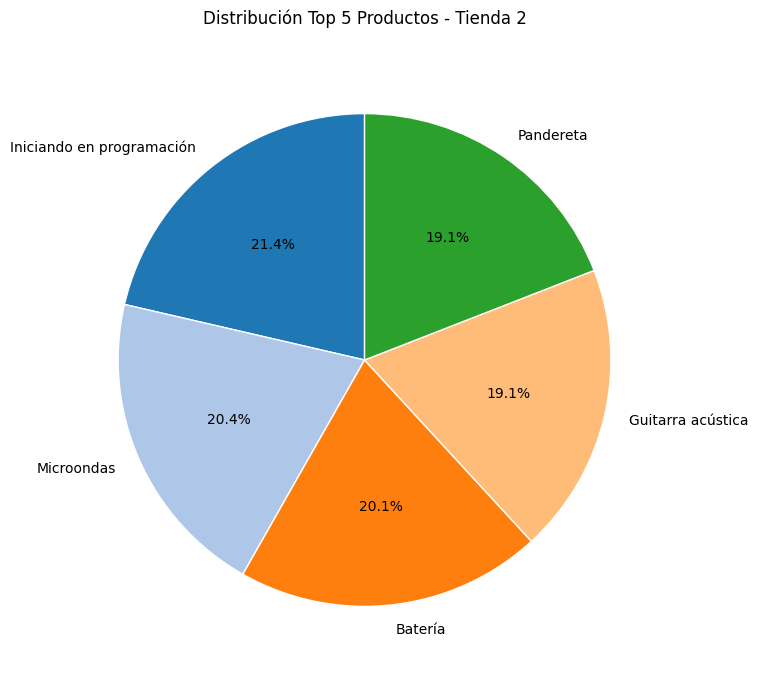

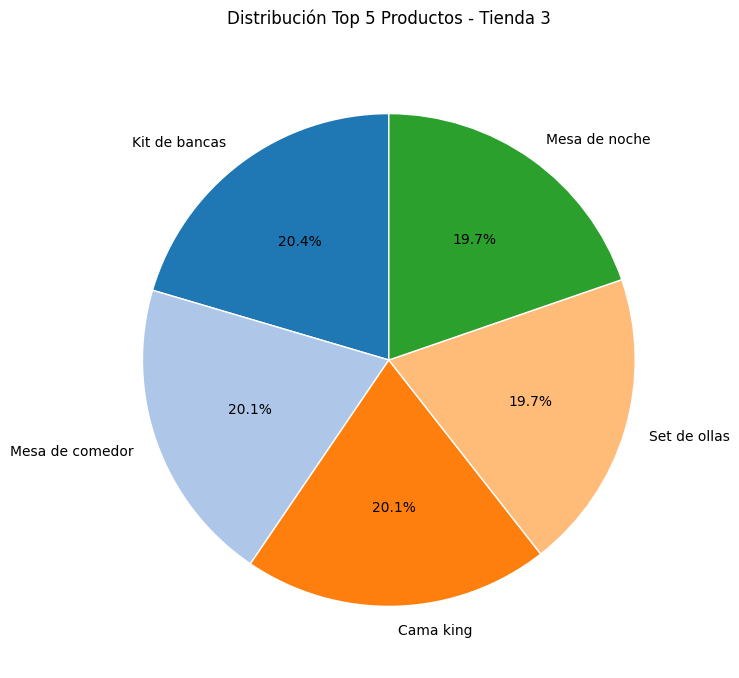

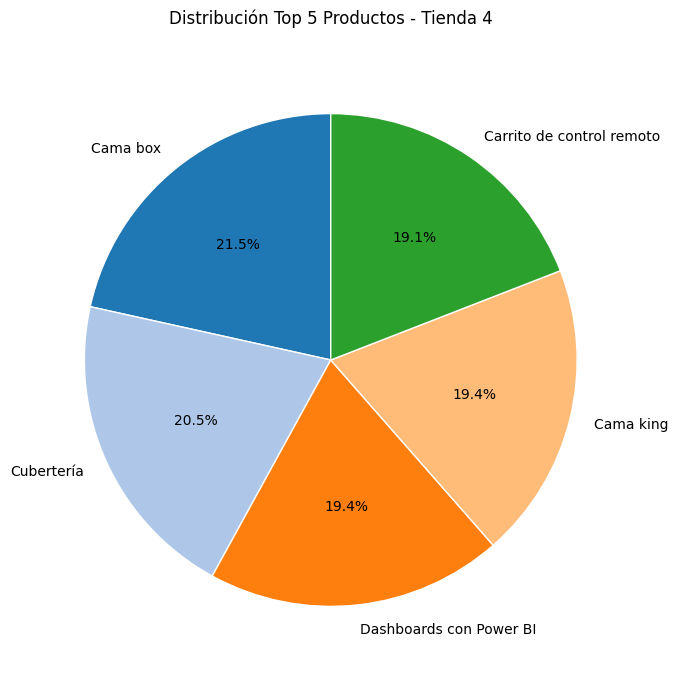

In [18]:
def grafico_circular_top_productos(tienda_df, nombre_tienda):
    top_productos = tienda_df['Producto'].value_counts().head(5)

    plt.figure(figsize=(8, 8))
    plt.pie(top_productos.values, labels=top_productos.index,
           autopct='%1.1f%%', startangle=90,
           colors=plt.cm.tab20.colors,
           wedgeprops={'edgecolor': 'white', 'linewidth': 1})

    plt.title(f'Distribución Top 5 Productos - {nombre_tienda}', pad=20)
    plt.show()

# Generar gráficos para cada tienda
grafico_circular_top_productos(tienda, 'Tienda 1')
grafico_circular_top_productos(tienda2, 'Tienda 2')
grafico_circular_top_productos(tienda3, 'Tienda 3')
grafico_circular_top_productos(tienda4, 'Tienda 4')

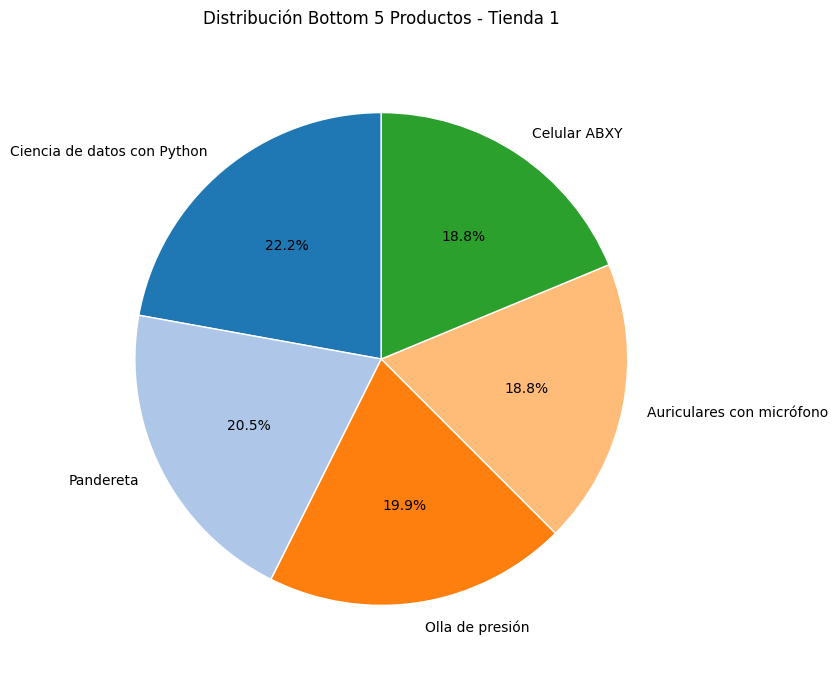

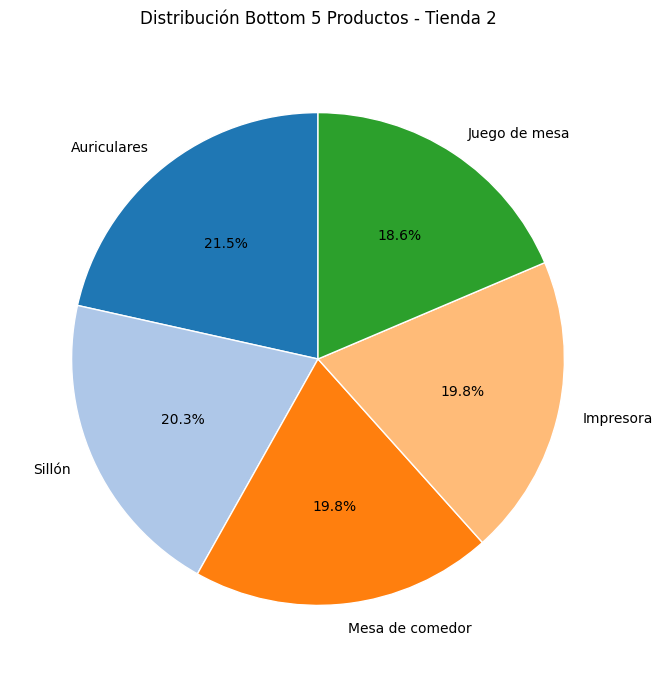

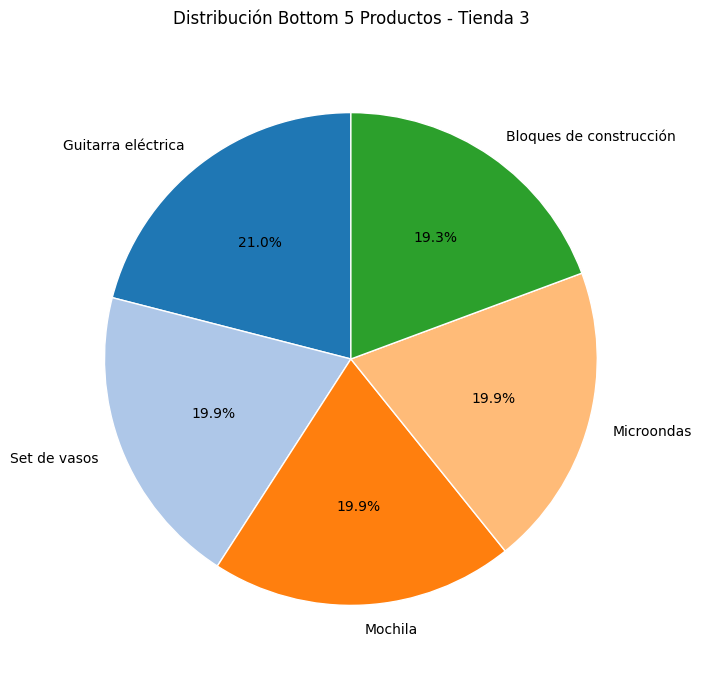

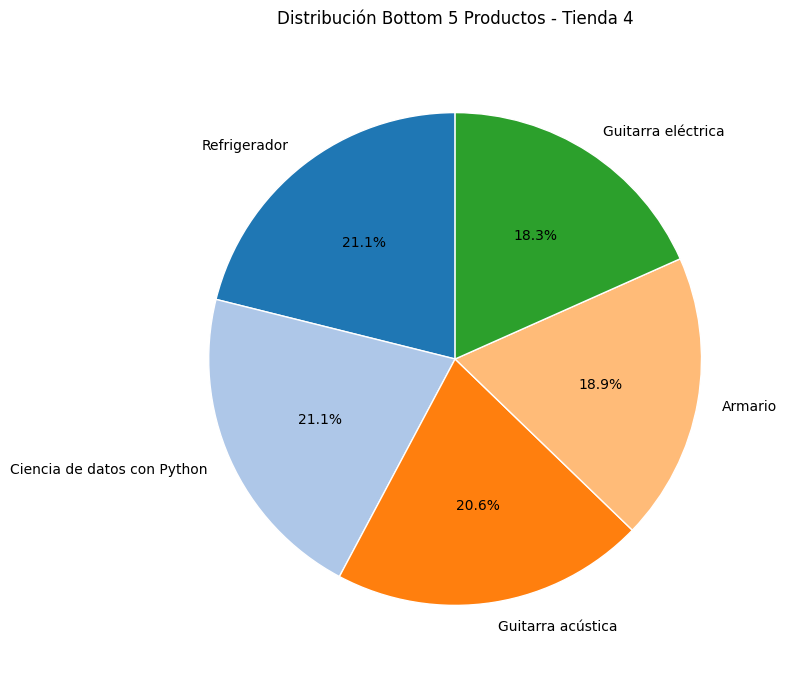

In [19]:
def grafico_circular_bottom_productos(tienda_df, nombre_tienda):
    bottom_productos = tienda_df['Producto'].value_counts().tail(5)

    plt.figure(figsize=(8, 8))
    plt.pie(bottom_productos.values, labels=bottom_productos.index,
           autopct='%1.1f%%', startangle=90,
           colors=plt.cm.tab20.colors,
           wedgeprops={'edgecolor': 'white', 'linewidth': 1})

    plt.title(f'Distribución Bottom 5 Productos - {nombre_tienda}', pad=20)
    plt.show()

# Generar gráficos para cada tienda
grafico_circular_bottom_productos(tienda, 'Tienda 1')
grafico_circular_bottom_productos(tienda2, 'Tienda 2')
grafico_circular_bottom_productos(tienda3, 'Tienda 3')
grafico_circular_bottom_productos(tienda4, 'Tienda 4')

# 5. Envío promedio por tienda

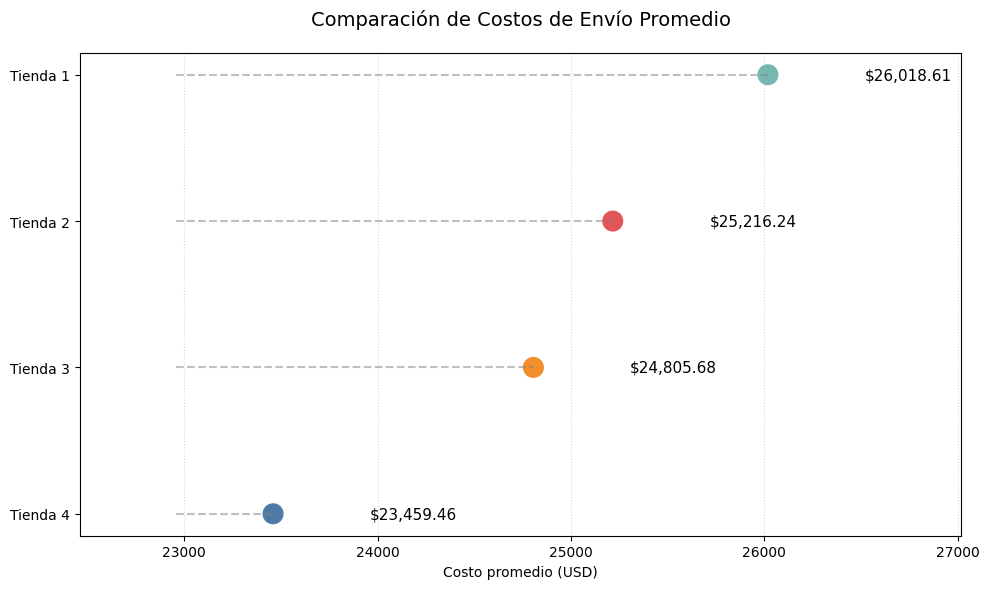

In [20]:
envio_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

plt.figure(figsize=(10, 6))
sorted_tiendas = sorted(envio_promedio.items(), key=lambda x: x[1])
tiendas = [x[0] for x in sorted_tiendas]
valores = [x[1] for x in sorted_tiendas]

plt.scatter(valores, tiendas, s=200, color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])

# Líneas de conexión
for i, val in enumerate(valores):
    plt.hlines(y=i, xmin=min(valores)-500, xmax=val, colors='gray', linestyles='dashed', alpha=0.5)

# Etiquetas de valor
for i, val in enumerate(valores):
    plt.text(val+500, i, f'${val:,.2f}', va='center', fontsize=11)

plt.title('Comparación de Costos de Envío Promedio', pad=20, fontsize=14)
plt.xlabel('Costo promedio (USD)')
plt.xlim(min(valores)-1000, max(valores)+1000)
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

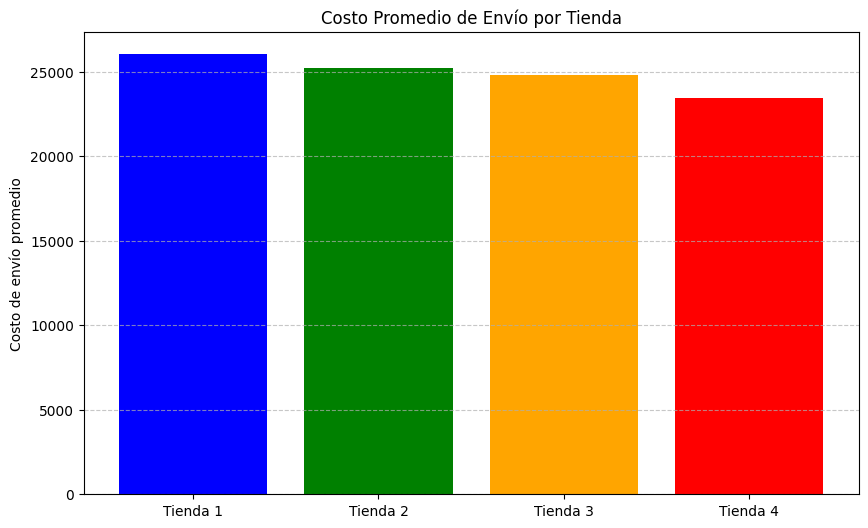

In [21]:
envio_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

plt.figure(figsize=(10, 6))
plt.bar(envio_promedio.keys(), envio_promedio.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Recomendación Final, basada en los datos analizados:

  Ventas Totales: La Tienda 4 tiene las ventas totales más bajas (1.038 billones) comparado con las otras tiendas.

  Promedio por Venta: La Tienda 4 también tiene el promedio por venta más bajo (440,362 vs 487,867 de la mejor tienda).

  Ingresos por Envíos: Los ingresos por envíos son más bajos en la Tienda 4.

  Calificaciones: La Tienda 4 tiene una calificación promedio similar a las demás (alrededor de 3), por lo que no destaca positivamente.

  Costo de Envío: El costo promedio de envío es similar en todas las tiendas.

Recomendación: El Sr. Juan debería vender la Tienda 4, ya que es la que presenta el peor desempeño en términos de ventas totales y promedio por venta, sin tener ventajas compensatorias en otras métricas clave.

# Informe Final: Recomendación de Venta

1. Introducción

Este informe analiza el desempeño de las 4 tiendas de Alura Store para identificar cuál presenta el menor rendimiento y debería ser vendida. El análisis considera:

    Ingresos totales

    Distribución de categorías de productos

    Calificaciones de clientes

    Productos más/menos vendidos

    Costos de envío

2. Análisis Comparativo
2.1. Ingresos Totales

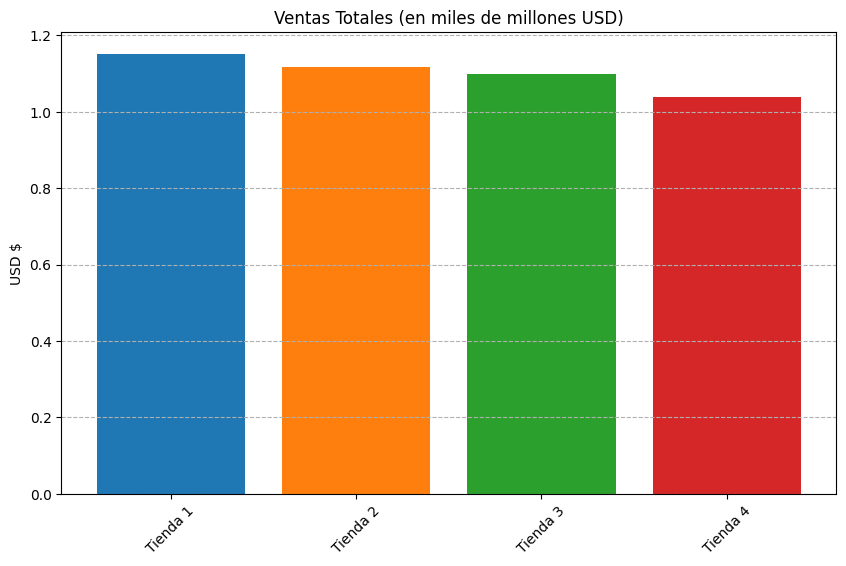

In [22]:
# Cálculo de ventas totales
ventas_totales = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(ventas_totales.keys(), [x/1e9 for x in ventas_totales.values()],
       color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
plt.title('Ventas Totales (en miles de millones USD)')
plt.ylabel('USD $')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Resultados:

    Tienda 1: $1.15B

    Tienda 2: $1.12B

    Tienda 3: $1.10B

    Tienda 4: $1.04B (10% menos que la líder)

2.2. Distribución de Productos

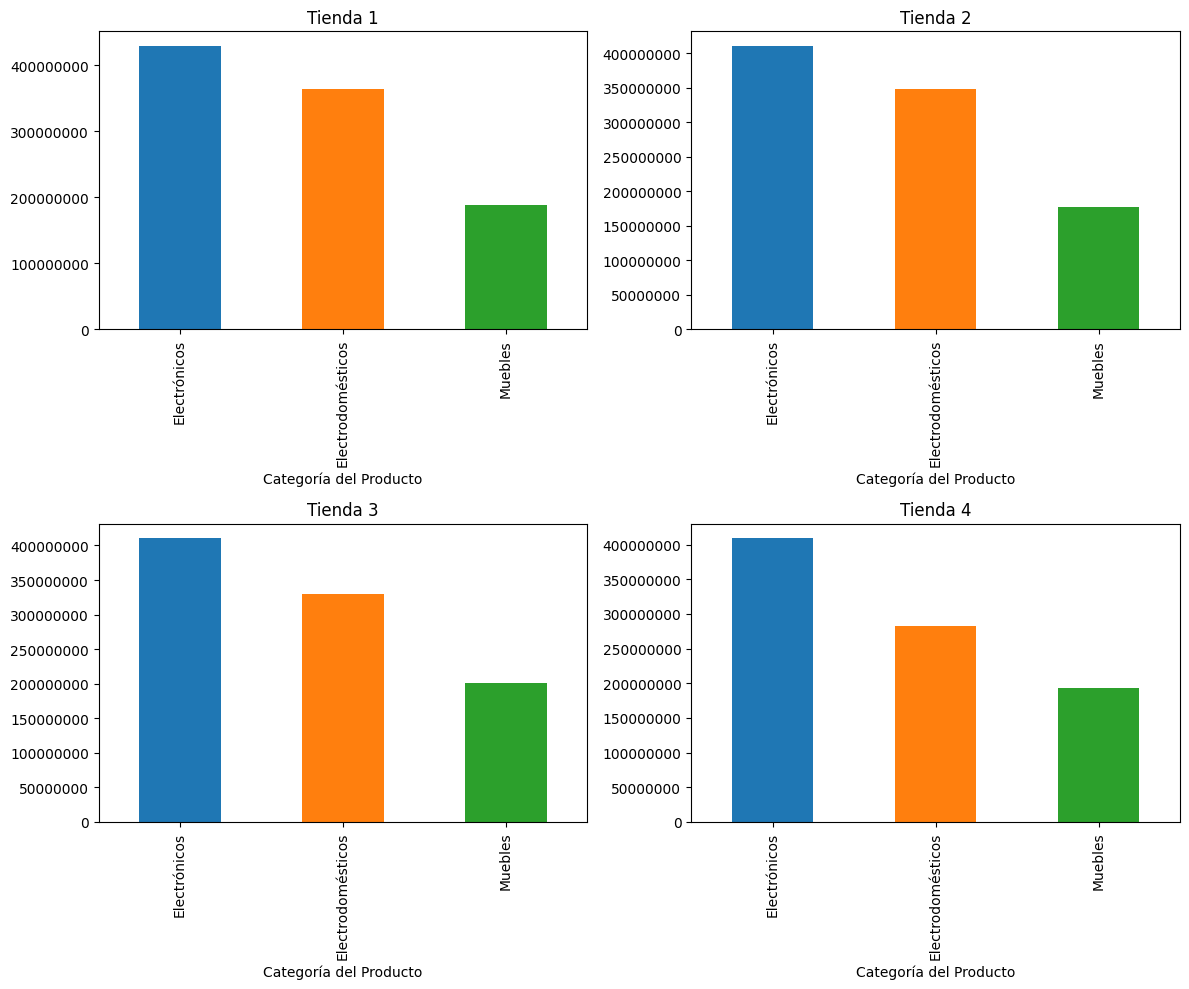

In [23]:
# Top categorías por tienda
def top_categorias(df, nombre):
    return df.groupby('Categoría del Producto')['Precio'].sum().nlargest(3)

# Gráfico comparativo
fig, axs = plt.subplots(2, 2, figsize=(12,10))
for idx, (df, name) in enumerate(zip([tienda, tienda2, tienda3, tienda4],
                                   ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])):
    data = top_categorias(df, name)
    ax = axs[idx//2, idx%2]
    data.plot(kind='bar', ax=ax, color=['#1f77b4','#ff7f0e','#2ca02c'])
    ax.set_title(name)
    ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Hallazgos:

    Todas dependen de electrónicos y muebles

    Tienda 4 tiene menor diversificación

2.3. Calificaciones de Clientes

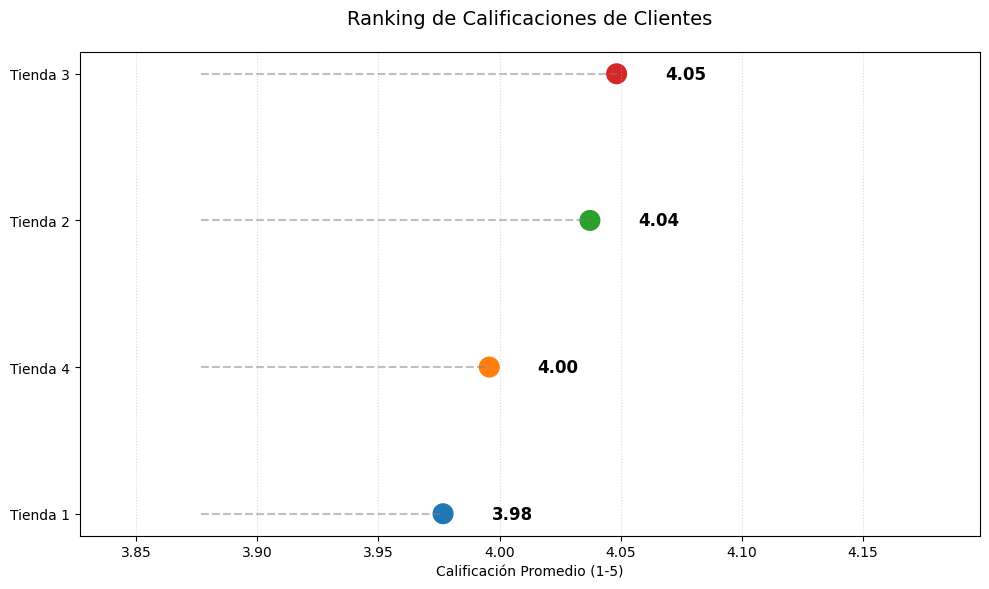

In [24]:
plt.figure(figsize=(10, 6))

# Ordenamos las tiendas por calificación
sorted_tiendas = sorted(calificaciones.items(), key=lambda x: x[1])
nombres = [x[0] for x in sorted_tiendas]
puntajes = [x[1] for x in sorted_tiendas]

# Creamos el gráfico de puntos
plt.scatter(puntajes, nombres, s=200, color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])

# Líneas de conexión
for i, valor in enumerate(puntajes):
    plt.hlines(y=i, xmin=min(puntajes)-0.1, xmax=valor,
              colors='gray', linestyles='dashed', alpha=0.5)

# Etiquetas de valores
for i, valor in enumerate(puntajes):
    plt.text(valor+0.02, i, f'{valor:.2f}',
            va='center', fontsize=12, fontweight='bold')

plt.title('Ranking de Calificaciones de Clientes', pad=20, fontsize=14)
plt.xlabel('Calificación Promedio (1-5)')
plt.xlim(min(puntajes)-0.15, max(puntajes)+0.15)
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

Resultados:

    Todas entre 2.9-3.1

    Diferencias mínimas (<0.2 puntos)

2.4. Costos de Envío

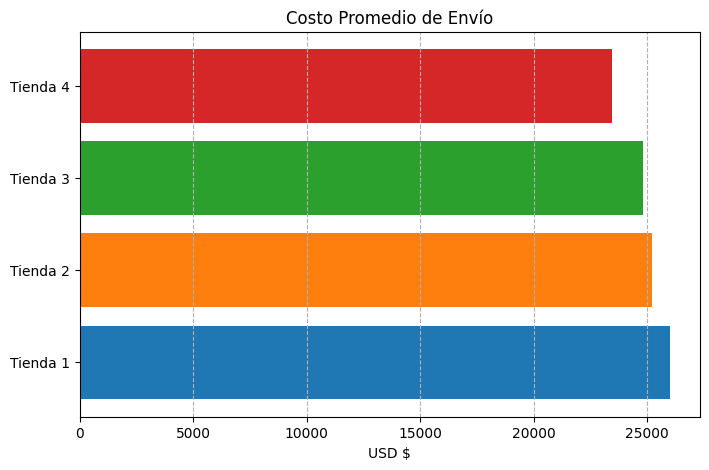

In [25]:
envios = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

plt.figure(figsize=(8,5))
plt.barh(list(envios.keys()), list(envios.values()),
       color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
plt.title('Costo Promedio de Envío')
plt.xlabel('USD $')
plt.grid(axis='x', linestyle='--')
plt.show()

Hallazgos:

    Diferencias <5% entre tiendas

    Tienda 4 tiene costos ligeramente menores

3. Recomendación Final

Tienda seleccionada para venta: Tienda 4

Justificación:

    Menores ingresos (10% menos que la líder)

    Baja diversificación de productos

    Inventario con más productos de baja rotación

    Sin ventajas compensatorias en costos o satisfacción

Beneficios esperados:

    Liberar $1.04B para reinversión

    Reducir costos operativos

    Enfocar recursos en tiendas más rentables

In [27]:
# Calculate the average rating for each store
calificaciones = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}